# Exercise 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import seaborn as sns
sns.set_theme(style='darkgrid')

## EDA

In [2]:
df = pd.read_csv('../datasets/2d-synthetic.csv')
df.head()

,x0,x1,label
0,9.833469,0.319565,0
1,1.801045,8.705072,0
2,4.423918,3.488906,1
3,0.280730,2.689037,1
4,5.999494,9.167512,0


In [3]:
X = df[['x0', 'x1']].to_numpy()
y = df['label'].to_numpy()

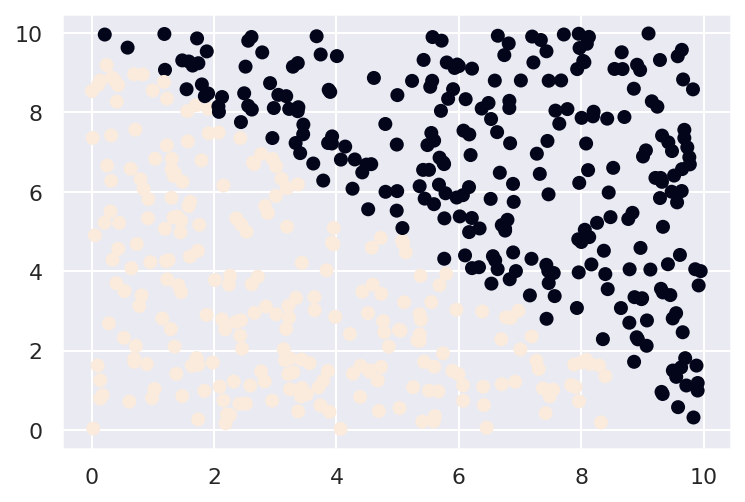

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

We can see a very linear, oblique separation boundary, this means that a tree-based classifier will have issues with it.

## Building a classifier

### Full dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(X))

1.0

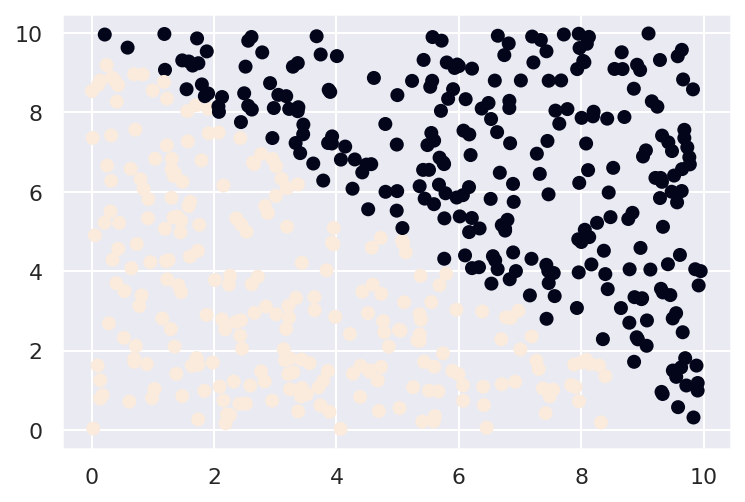

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=clf.predict(X))

### Train/Test split

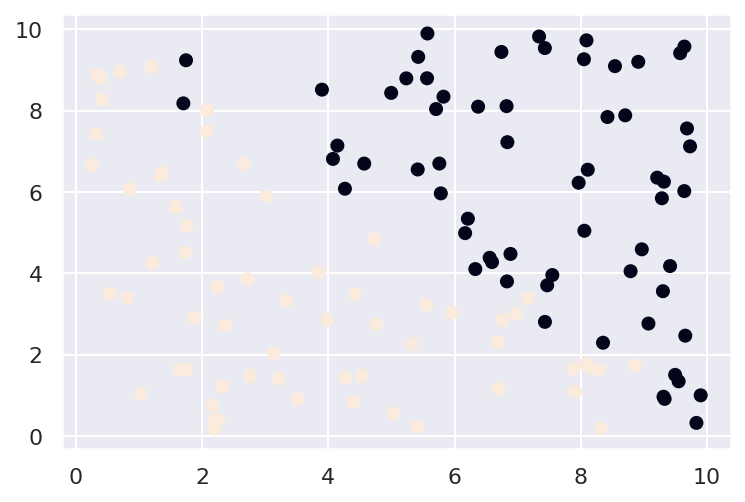

In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test))

In [10]:
accuracy_score(y_test, clf.predict(X_test))

0.96

## Plotting the classifier's decision boundary

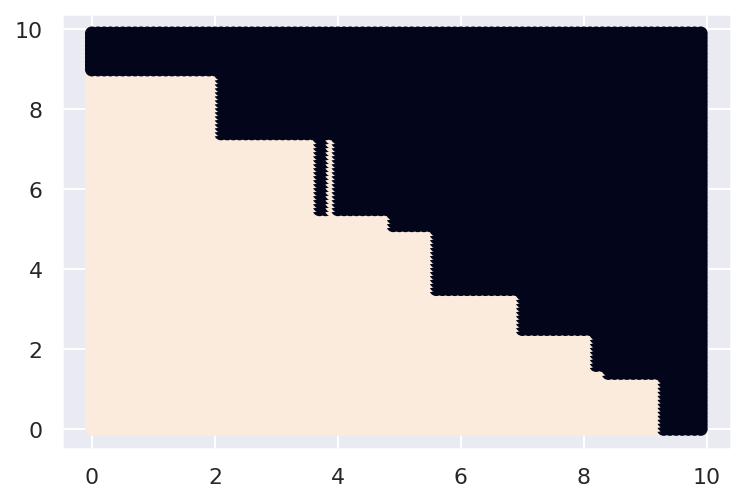

In [11]:
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.1)
y = np.arange(0, 10, 0.1)
xx, yy = np.meshgrid(x, y)
plt.scatter(xx, yy, c=[clf.predict(np.array([x, y]).reshape(1, -1)) for x in np.arange(0, 10, 0.1) for y in np.arange(0, 10, 0.1)])